# Guided Project: Investigating Fandango Movie Ratings

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article — a great piece of data journalism that's totally worth reading.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Import and Explore The Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy import arange
import seaborn as sns

pd.set_option('max_columns', 180)

In [2]:
previous = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

In [3]:
previous.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [5]:
previous.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Fandango_Stars', 'Fandango_Ratingvalue',
       'RT_norm', 'RT_user_norm', 'Metacritic_norm', 'Metacritic_user_nom',
       'IMDB_norm', 'RT_norm_round', 'RT_user_norm_round',
       'Metacritic_norm_round', 'Metacritic_user_norm_round',
       'IMDB_norm_round', 'Metacritic_user_vote_count', 'IMDB_user_vote_count',
       'Fandango_votes', 'Fandango_Difference'],
      dtype='object')

Information on the previous columns can be found here:
    https://github.com/fivethirtyeight/data/tree/master/fandango 

In [6]:
after.columns

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')

Information on the after columns can be found here:
    https://github.com/mircealex/Movie_ratings_2016_17

## Isolate Columns In Both Datasets About Fandango's Ratings

In [7]:
# Isolate the columns that offer information about Fandango's ratings
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [8]:
fandango_after = after[['movie', 'year', 'fandango']].copy()
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Findings

We are interested in finding whether there as been a shift in the Fandango ratings after the release of Hickey's article which idenified a bias in their ratings.

__Fandango_before Sampling Criteria__

The sample contains:
- Every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score
- At least 30 fan reviews on Fandango.
- Tickets on sale in 2015

The sample is clearly not random as every film didn't have an equal chance of making it into the sample. It's debatable whether this sample is representative of the entire population as these films maybe better than the entire population as they have for example received a higher number of reviews.

__Fandango_after Sample__

The sample contains:
- Movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. 

The sample again is clearly not random as it focues on the most popular films between 2016-17. A different methodology has been used for this sample which will make it challenging to compare the 2 samples to identify changes in the film ratings before and after the article.

This sample is also not representative of the entire population as it is open to temporal trends.

Both authors have selected a sample which suits their research questions, know as purpsive sampling.

Neither sample seems suitable for our projects goal. 




## Changing Goals

At this point, we have at least two alternatives: either we collect new data, either we change the goal of our analysis by placing some limitations on it.

We have decided to change the focus of our analysis as follows:

We will aim instead to find if there is any difference between Fandango popular film ratings in 2015 and Fandango's ratings for popular films in 2016.

we now have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.


## Defining the Term Popular

We will define popular as films with at least 30 reviews on Fandango's website. From Hickey's methodology, we know that the films included had at least 30 reviews, but for the later sample, we don't know how many reviews the films had. We therefore need to be skeptical of the sample and verify whether these films do infact meet our criteria.

In [9]:
fandango_after.sample(10, random_state = 1)


,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [10]:
data = {'Movie': ['Mechanic: Resurrection', 'Warcraft', 'Max Steel', 'Me Before You', 'Fantastic Beasts and Where to Find Them', 'Cell','Genius', 'Sully', 'A Hologram for the King', 'Captain America: Civil War'],
       'Reviews': [25559, 31503, 6820, 30575, 87701, 3793, 297, 48405, 10202, 179578]}

pd.DataFrame(data)


,Movie,Reviews
0,Mechanic: Resurrection,25559
1,Warcraft,31503
2,Max Steel,6820
3,Me Before You,30575
4,Fantastic Beasts and Where to Find Them,87701
5,Cell,3793
6,Genius,297
7,Sully,48405
8,A Hologram for the King,10202
9,Captain America: Civil War,179578


A random sample of films from the 2016/2017 sample was compared to views as of 29/02/20. Whilst we can't know for sure if these films had over 30 views at the time the sample was taken. It clear shows that these are popular films that have received a high number of reviews. There are also a number of box office successes in the sample which further indicates the popularity of the films.

In [11]:
sum(fandango_previous['Fandango_votes'] < 30)

0

As we can see, no films have been included in the earlier sample that had less than 30 reviews.

## Filtering Films On Their Release Year

If you explore the data sets enough, you'll notice that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.

### Hickey's Sample

The year is included with in the title column, so we will isolate the year and add it to a new column.


In [12]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [13]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

17 films feature in the sample that were released in 2014. Lets remove the films and copy to a new sample.

In [14]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

## 2016/2017 Sample

In [15]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

23 films from 2017 are included in the sample. Lets remove them and copy to a new data set.

In [16]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparison of Distribution Shapes for 2015 and 2016

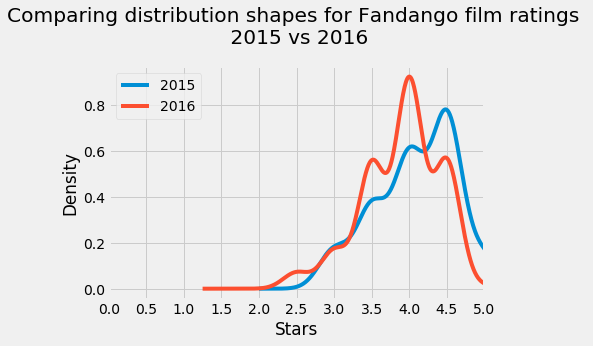

In [17]:
plt.style.use('fivethirtyeight')
fandango_2015['Fandango_Stars'].plot.kde(label = "2015", legend = True )
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango film ratings \n 2015 vs 2016", y=1.07)
# the 'y' parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.show()
              

### Findings

- Both samples are strongly left skewed
- The 2016 distribution is slightly shifted to the left in comparison to 2015.

The samples are highly skewed towards higher fan ratings with films generally receiving high or very high ratings. These high ratings can be compared against other ratings sites to find if Fandango's ticket sales business skews their ratings. This however is outside the scope of this project.

The 2016 sample features a more classic pyramid shape with a peak around 4 stars and a lower frequecy of films with 4.5 stars and 3.5 stars repectively. The 2015 sample is relatively more 'left skewed' distribution with a peak at 4.5 stars, and a decreasing frequency down to 2.5 stars.

This high level comparison would indicate that there has been a shift between Fandango's ratings for popular films in 2015, and 2016 and that ratings were slightly lower the following year for popular films.


## Examining the frequency distribution tables of the two distributions.

In [18]:
print("2015" + '\n' + '-' * 15)
fandango_2015['Fandango_Stars'].value_counts().sort_index()

2015
---------------


3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [19]:
print("2016" + '\n' + '-' * 15)
fandango_2016['fandango'].value_counts().sort_index()

2016
---------------


2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

The samples contain a different number of films. The 2015 sample contains 129 films whereas the 2016 sample contains 191 films. This makes comparing the absolute frequencies challenging. We will therefore compare the relative frequencies to see if there are any patterns.

### Relative frequencies

In [20]:
print("2015" + '\n' + '-' * 15)
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() *100

2015
---------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [21]:
print("2016" + '\n' + '-' * 15)
fandango_2016['fandango'].value_counts(normalize=True).sort_index() *100

2016
---------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The relative frequencies show a much clearer picture of the differences between 2015 and 2016. The percentage of films that fall in either the 5 star or 4.5 star is higher in 2015 than it is in 2016. In fact, 7% of films were given 5 stars in the 2015 sample in comparison to 0.5% in 2016. This would indicate that there has been a downward shift in the ratings between years.

The minimum rating is also lower in 2016 with 3% of sample films given 2.5 stars. No films in the 2015 sample were given 2.5 stars. having read Hickey's article, this could be down to the rounding methods which fandango used in their html code. Films which had a half star rating were rounded up to the next whole star rating.

There is a higher percentage of films between 3.5 and 4 stars in 2016 than in 2015. This would confirm our findings from the distribution shapes.

## Summary Statistics


In [22]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()

summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


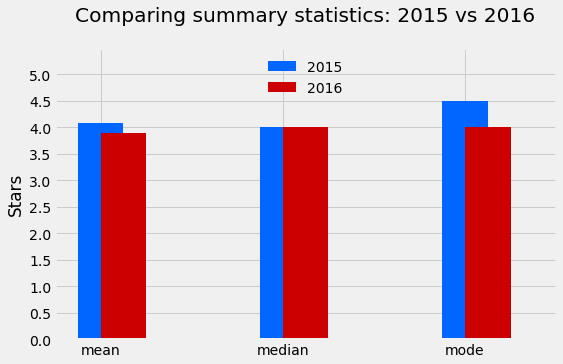

In [23]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066ff', label = '2015', align = 'center', legend = True, width=0.25)
summary['2016'].plot.bar(color = '#cc0000', label = '2016', align = 'edge', legend = True, width=0.25, rot=0, figsize=(8,5))
plt.title("Comparing summary statistics: 2015 vs 2016", y=1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(loc ='upper center', framealpha=0)
plt.show()

### Findings

There is a 0.2 difference between the means for 2015 and 2016 which represents a 5% downward shift for 2016.

The median is the same for both sample years but the mode shows a half point downward shift for 2016. This confirms our findings for both the Kernel plot and releative frequency distributions that the 2016 sample ratings are slightly lower than 2015.

## Conclusion

Our Analysis shows that there is a slight difference between Fandango's ratings for popular films in 2015 and Fandango's ratings for popular films in 2016. We have also determined that on average, popular films released in 2016 were rated around 5% lower on Fandango than popular films released in 2015.

Whilst we cannot be completely sure of the reasons for this change in Fandango's rating system. Chances are high that they have made changes after Hickey's analysis and have for example, removed the biased rounding system that was present in their html. 


